# **Kickstarter Projeleri Veri Analizi**

**Kütühaneleri import ederek başlayalım.**

In [1]:
import pandas as pd
import numpy as np

# Veri görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns


# Genel olarak tabloları print ettiğimizde tek satır olarak gözükmesini sağlamak için birkaç ayarlama yapalım.
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 1000)

In [2]:
# kickstarter-projects verisetinde iki farklı .csv dosyası mevcuttur. Ben ks-projects-201801.csv dosyası üzerinden br analiz gerçekleştireceğim.
df_ = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")
df = df_.copy()
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# 1. Keşifsel Veri Analizi (EDA)
***Öncelikle verisetinde NaN değerler olup olmadığını kontrol edelim.***

In [3]:
# Tablodaki verilerin veri tiplerini görelim.
print(df.info(),"\n*************************************************") 
print(df.describe(),"\n*************************************************")
print(df.shape)
# Veri üzerinde NaN değer kontrolü yapalım.
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None 
****

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [4]:
# ID sütununun benzersiz olup olmadığını kontrol edelim
print(f"ID sütunu 'Unique Key' midir? : {df['ID'].is_unique}")


ID sütunu 'Unique Key' midir? : True


**Görüldüğü üzere yeterli sayıda NaN değere sahip olmadığından aşağıdaki NaN değer ekleme fonksiyonunu kullanalım.**

In [5]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = df.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = df.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df = add_random_missing_values(dataframe = df,missing_rate = 0.03)

In [6]:
df.isnull().sum()

ID                  11050
name                11216
category            11305
main_category       11108
currency            11300
deadline            11129
goal                11142
launched            11166
pledged             11298
state               11085
backers             11241
country             11315
usd pledged         14969
usd_pledged_real    11030
usd_goal_real       11202
dtype: int64

**Başlangıça göre her bir öznitelik için %3 oranında NaN değer eklenmiş oldu.**

**-Öznitelik Türleri**

In [7]:
# Veri türlerini ve toplam benzersiz değerleri görüntüleyelim.
print("Öznitelik Türleri:")
print(df.dtypes)

Öznitelik Türleri:
ID                  float64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers             float64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


Öznitelikler:
* ID : Veri setindeki her proje için unique olduğunu belirten veriler / **Numerik**
* name : Projenin adı / **String**
* category : Projenin kategorisi / **Kategorik**
* main_category : Projeninana kategorisi / **Kategorik**
* currency : Bağışın toplandığı para birimi / **String**
* deadline : Proje için bağış toplanabilecek son tarih / **Tarih**
* goal : Proje için toplanacak bağış hedefi / **Numerik**
* launched : Proje için bağış toplanmaya başlangıç tarih / **Tarih**
* pledged : Proje için toplanan bağış miktarı / **Numerik**
* state : Proje durum bilgisi / **Kategorik**
* backers : Projeye destekte bulunan kişi sayısı / **Numerik**
* country : Ülke adı / **String**
* usd_pledged : Farklı para birimindeki toplanan miktarların USD cinsinden miktarı / **Numerik**
* usd_pledged_real : Farklı para birimindeki toplanan miktarların USD cinsinden miktarı / **Numerik**
* usd_goal_real : Farklı para birimindeki hedef miktarların USD cinsinden miktarı / **Numerik**

**Yukarıda belirtildiği gibi veri tipleri güncelleyelim.**

In [8]:
df = df.astype({
    'ID': 'float64',  
    'category': 'category',
    'main_category': 'category',
    'currency': 'category',
    'state': 'category',
    'country': 'category'
})

# Tarih sütunlarını datetime türüne dönüştürme
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')

# Ayrıca launched özniteliğini de deadline özniteliği formatına getirelim.
df['launched'] = pd.to_datetime(df['launched']).dt.date

df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1.000002e+09,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,NaT,1000.0,2015-08-11,0.0,failed,0.0,GB,0.0,0.0,1533.95
1,1.000004e+09,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,NaN,US,100.0,2421.0,30000.00
2,1.000004e+09,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3.0,US,220.0,220.0,45000.00
3,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1.0,US,1.0,1.0,5000.00
4,1.000011e+09,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,9.999764e+08,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17,25.0,canceled,1.0,US,25.0,25.0,50000.00
378657,9.999776e+08,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22,155.0,failed,5.0,US,155.0,155.0,1500.00
378658,9.999864e+08,Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1.0,US,20.0,20.0,15000.00
378659,9.999879e+08,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6.0,US,200.0,NaN,15000.00


**Projenin bağış topladığı süreyi de analiz etmek ve bağış toplama üzerinde etkisi olup olmadığını görebilmek için "project_window" adında yeni bir öznitelik ekleyelim.**

In [9]:
# deadline sütununu da tarih formatına dönüştürelim
df['deadline'] = pd.to_datetime(df['deadline']).dt.date

# Tarihler arasındaki farkı hesaplayalım
df['project_window'] = (pd.to_datetime(df['deadline']) - pd.to_datetime(df['launched'])).dt.days

print(df[['launched', 'deadline', 'project_window']].head())


     launched    deadline  project_window
0  2015-08-11         NaT             NaN
1  2017-09-02  2017-11-01            60.0
2  2013-01-12  2013-02-26            45.0
3  2012-03-17  2012-04-16            30.0
4  2015-07-04  2015-08-29            56.0


Bu noktada "**ID**" verileri, unique values olduğundan veriye bir katkıda bulunmamaktadır. Aynı şekilde "**name**" sütunu da (bir LLM modeli geliştirmediğimden) veri üzerinde bir etkiye sahip değildir. Bu yüzden bu sütunları silebiliriz.

In [10]:
df.drop(['ID', 'name'], axis=1, inplace=True)
df.head(10)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,project_window
0,Poetry,Publishing,GBP,NaT,1000.0,2015-08-11,0.00,failed,0.0,GB,0.00,0.00,1533.95,NaN
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.00,failed,NaN,US,100.00,2421.00,30000.00,60.0
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.00,failed,3.0,US,220.00,220.00,45000.00,45.0
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.00,failed,1.0,US,1.00,1.00,5000.00,30.0
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.00,canceled,14.0,US,1283.00,1283.00,19500.00,56.0
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.00,successful,224.0,US,52375.00,52375.00,50000.00,35.0
6,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.00,successful,16.0,US,1205.00,1205.00,1000.00,20.0
7,Drinks,Food,NaN,2016-03-17,25000.0,2016-02-01,453.00,failed,40.0,US,453.00,453.00,25000.00,45.0
8,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24,8233.00,NaN,58.0,US,8233.00,8233.00,125000.00,35.0
9,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11,6240.57,canceled,43.0,US,6240.57,6240.57,65000.00,30.0


**Numerik** ve **Kategorik öznitelikleri** kullanım kolaylığı için **bir listeye tanımlayalım**.

In [11]:
numeric_columns = ['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']
categorical_columns = ['category', 'main_category', 'currency', 'state', 'country']


**Bu adımda Eksik veriler ile ilginelim.Öncelikle tarih verisi barındaran "launched" ve "deadline" öznitelikleri eğer NaN değer taşıyorsa bu satırları silerek başlayalım. Projenin bağış topladığı aralık, analiz için kritik olacağından buradaki eksik değerleri silelim.Numerik öznitelikler için NaN değer taşıyan satırları, ilgili özniteliğin ortalama değeriyle dolduralım.Kategorik öznitelikler için ise o öznitelik için en çok tekrar değer (mod) ile dolduralım.**


In [12]:
#  launched veya deadline öznitelikleri NaN değer ise silelim.
df.dropna(subset=['launched', 'deadline'], inplace=True)

df[numeric_columns] = df[numeric_columns].apply(lambda col: col.fillna(col.mean()))

df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [13]:
print(df.isnull().sum())
df

category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
project_window      0
dtype: int64


,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,project_window
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,105.509541,US,100.0,2421.000000,30000.000000,60.0
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3.000000,US,220.0,220.000000,45000.000000,45.0
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1.000000,US,1.0,1.000000,5000.000000,30.0
4,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14.000000,US,1283.0,1283.000000,19500.000000,56.0
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,224.000000,US,52375.0,52375.000000,50000.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17,25.0,canceled,1.000000,US,25.0,25.000000,50000.000000,30.0
378657,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22,155.0,failed,5.000000,US,155.0,155.000000,1500.000000,27.0
378658,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01,20.0,failed,1.000000,US,20.0,20.000000,15000.000000,46.0
378659,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13,200.0,failed,6.000000,US,200.0,8986.216333,15000.000000,31.0


# 2. Grafikler

**Aşağıda kategorik öznitelikler için grafikler çıkartalım ve grafikleri yorumlayalım.**

category
Product Design     31068
Documentary        14779
Music              14378
Tabletop Games     12950
Shorts             11320
                   ...  
Residencies           66
Letterpress           46
Chiptune              35
Literary Spaces       23
Taxidermy              9
Name: count, Length: 159, dtype: int64 



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


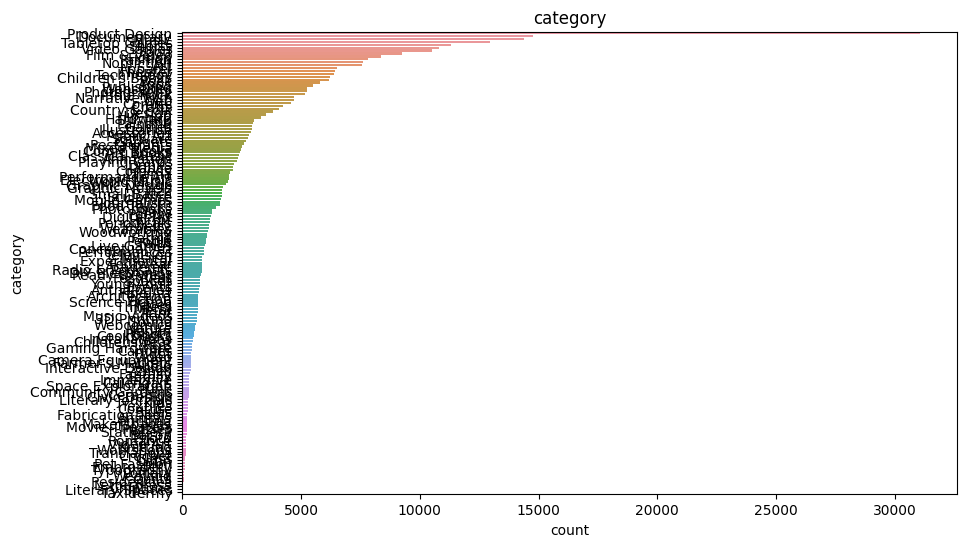

main_category
Film & Video    68626
Music           47437
Publishing      36433
Games           32214
Technology      29783
Design          27445
Art             25776
Food            22557
Fashion         20812
Theater         10024
Comics           9951
Photography      9848
Crafts           8036
Journalism       4328
Dance            3468
Name: count, dtype: int64 



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


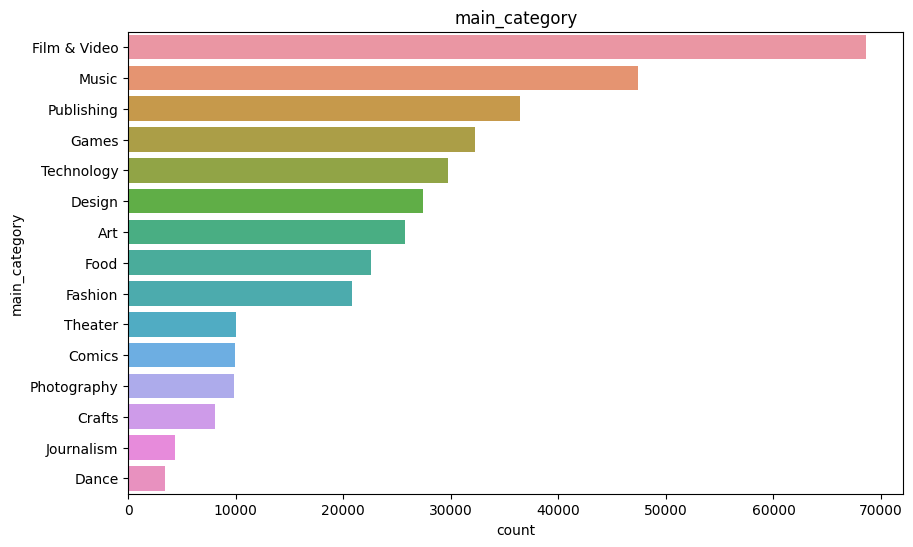

currency
USD    280642
GBP     31235
EUR     15861
CAD     13654
AUD      7294
SEK      1638
MXN      1598
NZD      1341
DKK      1030
CHF       702
NOK       644
HKD       567
SGD       500
JPY        32
Name: count, dtype: int64 



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


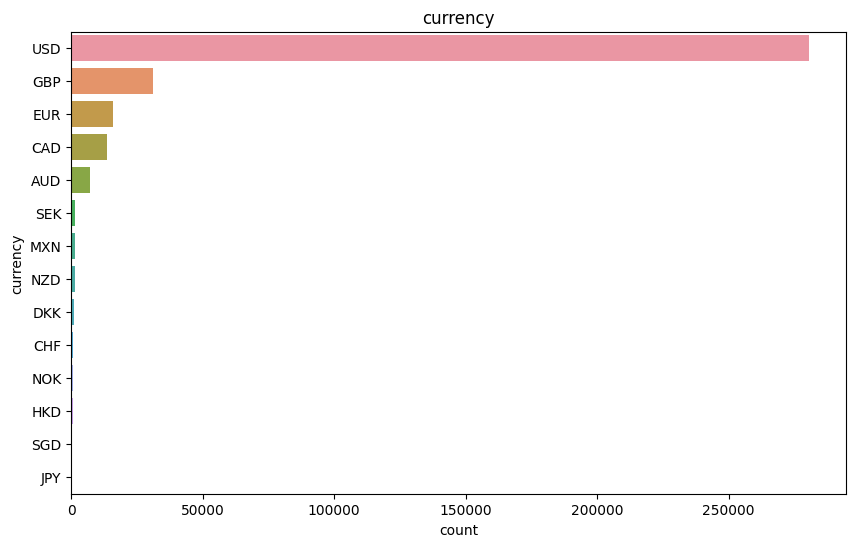

state
failed        191270
successful    122482
canceled       35431
undefined       3304
live            2562
suspended       1689
Name: count, dtype: int64 



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


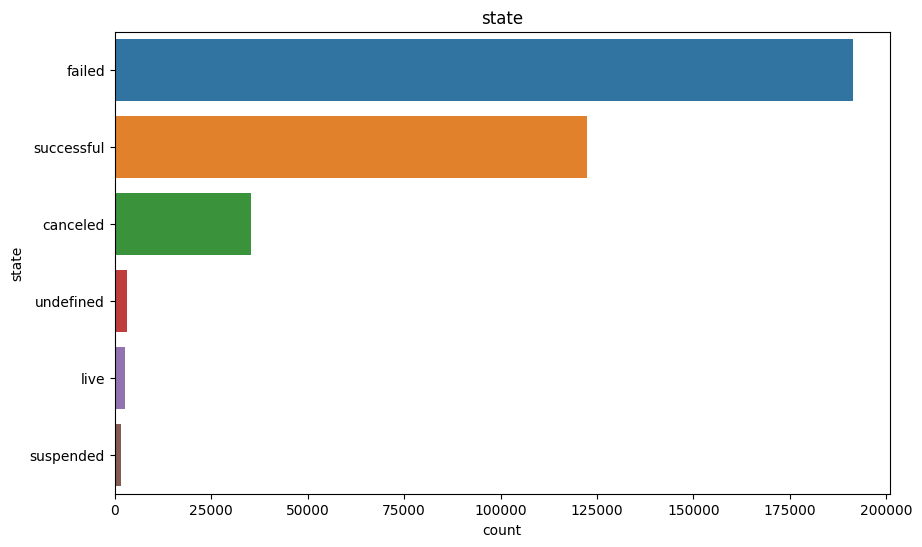

country
US      278005
GB       30808
CA       13484
AU        7191
DE        3792
N,0"      3521
FR        2695
NL        2644
IT        2627
ES        2080
SE        1621
MX        1593
NZ        1320
DK        1014
IE         739
CH         698
NO         638
HK         567
BE         564
AT         542
SG         507
LU          55
JP          33
Name: count, dtype: int64 



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


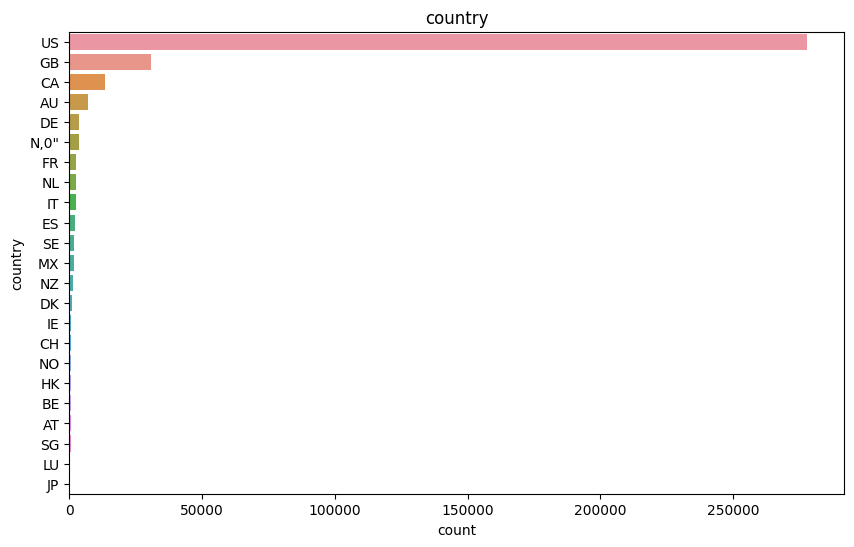

In [14]:
for col in categorical_columns:
    print(df[col].value_counts(), "\n")
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.show()



**"category"** sütunu içn benzersiz değer sayısı çok olduğundan, daha net bir biçimde **hangi kategorilerde daha sık bağış toğlandığını** görebiliriz.

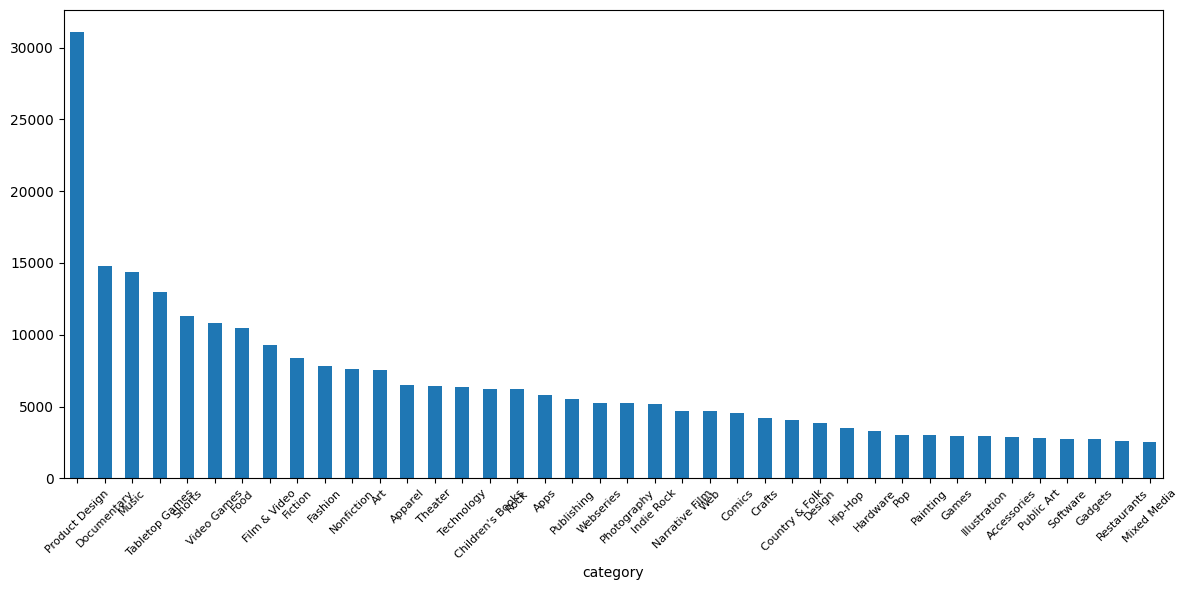

In [15]:
plt.figure(figsize=(12, 6))
top_n = 40  
df['category'].value_counts().head(top_n).plot(kind='bar')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()


Görünüşe göre en çok "Product Design" kategorisindeki projeler bağışa açılmaktadır.

state
failed        191270
successful    122482
canceled       35431
undefined       3304
live            2562
suspended       1689
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


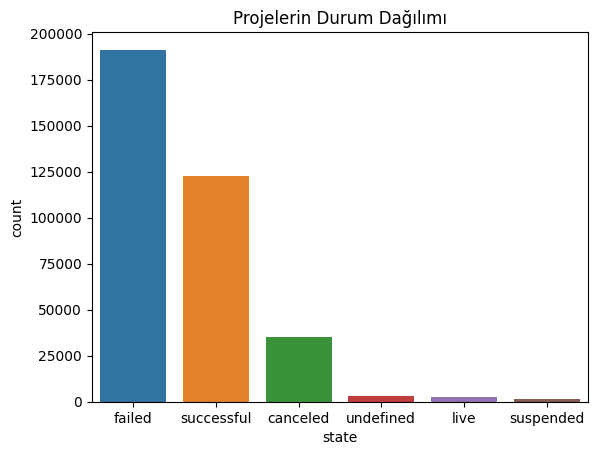

In [16]:
# State sütunu dağılımı grafiği
print(df['state'].value_counts())

sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title("Projelerin Durum Dağılımı")
plt.show()


Yukarıda görmüş olduğumuz üzere bu veri setinde **"Outcome Feature"** olarak kullanacağımız öznitelik olan **"state" özniteliğini 0 ve 1 olarak kullanabilmek adına**, sadece **"successful" ve "failed" olarak etiketleyebilmek** adına diğer bütün değerleri de "failed" kategorisinin içine dahil ediyoruz.

state
failed        234256
successful    122482
Name: count, dtype: int64


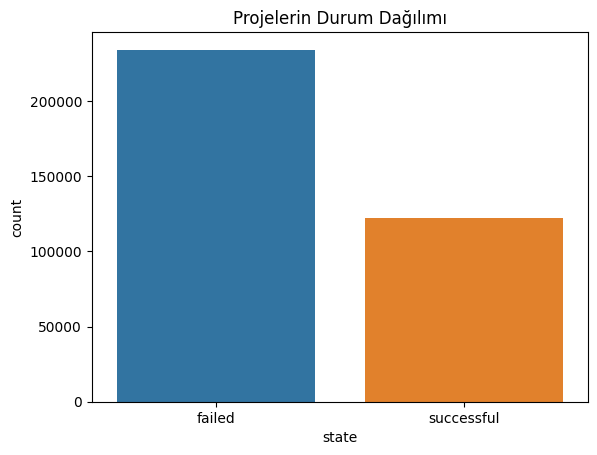

In [17]:
# state sütununu ikili etiket haline getirelim
df['state'] = df['state'].apply(lambda x: 'failed' if x not in ['successful'] else x)

print(df['state'].value_counts())

sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title("Projelerin Durum Dağılımı")
plt.show()

Burada yukarıda **"country"** özniteliği özelinde dikkatimi çeken bir nokta oldu. İlk birkaç değer sonrasında gelen değerler çok az miktarda olduğu için, bir sonraki adımda **Makine öğrenmesi modeli için dengesizlik oluşturabilir**. Bu nedenle en azından dengesizliği belirli bir oranda azaltmak için bir eşik değer altındaki verileri silebiliriz.

country
US       278005
GB        30808
CA        13484
Other      9891
AU         7191
DE         3792
N,0"       3521
FR         2695
NL         2644
IT         2627
ES         2080
Name: count, dtype: int64


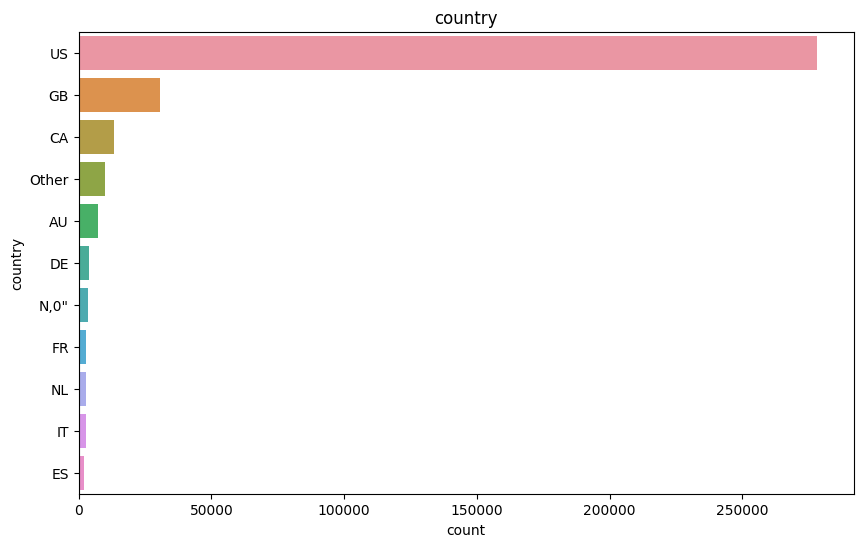

In [18]:
# country sütunundaki ülkelerin dağılımını kontrol edelim
country_counts = df['country'].value_counts()

# Eşik değer belirleyelim
threshold = 2000
other_countries = country_counts[country_counts < threshold].index

# Eşik değerden az olan değerleri "Other" kategorisine atayalım.
df['country'] = df['country'].apply(lambda x: 'Other' if x in other_countries else x)

print(df['country'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="country", order=df[col].value_counts().index)
plt.title(col)
plt.show()

**Numerik verilerimizi StandardScaler işlemi uygulayarak standardize edelim.**

In [19]:
from sklearn.preprocessing import StandardScaler

# Standartizasyon işlemi
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df[numeric_columns].head())


       goal   pledged       backers  usd pledged  usd_pledged_real  usd_goal_real
1 -0.016233 -0.078573 -4.705815e-17    -0.101637         -0.076356      -0.013604
2 -0.003308 -0.102739 -1.131508e-01    -0.099850         -0.101955      -0.000299
3 -0.037776 -0.105143 -1.153584e-01    -0.103111         -0.104502      -0.035779
4 -0.025281 -0.091068 -1.010089e-01    -0.084019         -0.089592      -0.022918
5  0.001001  0.469889  1.307907e-01     0.676865          0.504629       0.004136


# 3. Encoding

Bu adımda **Kategorik değişkenleri Makine Öğrenmesi modeline hazırlamak adına Encoding işlemi uygulayalım**. Encoding için kendi tercihim olarak **Label Encoder** kullandım.

In [20]:
from sklearn.preprocessing import LabelEncoder # Label Encoder için kütühane import edelim.

columns_to_encode = ['category', 'main_category', 'currency', 'state', 'country']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())


   category  main_category  currency    deadline      goal    launched   pledged  state       backers  country  usd pledged  usd_pledged_real  usd_goal_real  project_window
1        93              6        13  2017-11-01 -0.016233  2017-09-02 -0.078573      0 -4.705815e-17       10    -0.101637         -0.076356      -0.013604            60.0
2        93              6        13  2013-02-26 -0.003308  2013-01-12 -0.102739      0 -1.131508e-01       10    -0.099850         -0.101955      -0.000299            45.0
3        90             10        13  2012-04-16 -0.037776  2012-03-17 -0.105143      0 -1.153584e-01       10    -0.103111         -0.104502      -0.035779            30.0
4        55              6        13  2015-08-29 -0.025281  2015-07-04 -0.091068      0 -1.010089e-01       10    -0.084019         -0.089592      -0.022918            56.0
5       123              7        13  2016-04-01  0.001001  2016-02-26  0.469889      1  1.307907e-01       10     0.676865          0.

# 4. Öznitelik Analizi

**Aşağıdaki fonksiyon ile birlikte veri seti için Korelasyon Matrisini oluşturalım ve yorumlayalım.**

Korelasyon Matrisi:
                       goal   pledged   backers  usd pledged  usd_pledged_real  usd_goal_real
goal              1.000000  0.006773  0.003922     0.005796          0.005183       0.912294
pledged           0.006773  1.000000  0.683993     0.753805          0.916981       0.005241
backers           0.003922  0.683993  1.000000     0.685425          0.745027       0.004625
usd pledged       0.005796  0.753805  0.685425     1.000000          0.788767       0.006719
usd_pledged_real  0.005183  0.916981  0.745027     0.788767          1.000000       0.005787
usd_goal_real     0.912294  0.005241  0.004625     0.006719          0.005787       1.000000


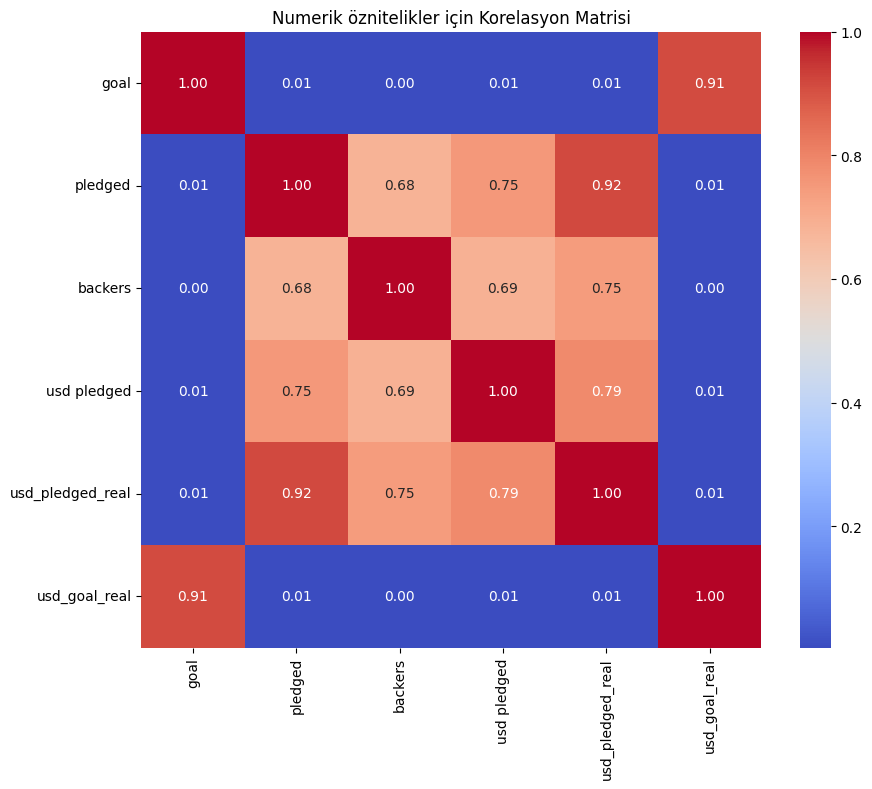

In [21]:
# Korelasyon matrisi oluşturalım
corr_matrix = df[numeric_columns].corr()
print("Korelasyon Matrisi:\n", corr_matrix)

# Isı haritası 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Numerik öznitelikler için Korelasyon Matrisi")
plt.show()


Korelasyonu yüksek olan öznitelikleri yorumlayalım.

- **"goal" ve "usd_goal_real" öznitelikleri arasında yüksek korelasyon (0.91) mevcuttur**. Bu noktada **"usd_goal_real" özniteliği, "goal" özniteliği üzerinden işlem görüp geliştirildiği için "goal" özniteliği veri setinden çıkartılabilir**.

- **"pledged" ve "usd_pledged_real" öznitelikleri arasında yüksek korelasyon (0.94) mevcuttur**. Bu noktada **"usd_pledged_real" özniteliği, "pledged" özniteliği üzerinden işlem görüp geliştirildiği için "pledged" özniteliği veri setinden çıkartılabilir**.

- Benzer şekilde **"usd_pledged_real" ve "usd pledged" öznitelikleri arasında da yüksek korelasyon (0.91) mevcuttur**. Bu noktada **"usd_pledged_real" özniteliği, "pledged" özniteliği üzerinden işlem görüp geliştirildiği için ve halıhazırda "pledged" özniteliği veri setinden çıkartılacağı için "usd pledged" özniteliği de veri setinden çıkartılabilir ve toplanan bağış miktarı verisi için sadece "usd_pledged_real" verisi kullanılabilir.**.

- **"usd_pledged_real"** ve **"backers"** öznitelikleri arasında da fark edilebilir bir korelasyon mevcuttur (0.74) fakat yukarıdaki gibi **çok yüksek bir seviyede olmadığından proje açısından kritik bir açıklayıcılığa sahip olabilir**. Bu yüzden **veri setinden çıkartılmamalıdır.**

In [22]:
df.drop(['goal', 'pledged',"usd pledged"], axis=1, inplace=True)
df

,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_window
1,93,6,13,2017-11-01,2017-09-02,0,-4.705815e-17,10,-7.635617e-02,-0.013604,60.0
2,93,6,13,2013-02-26,2013-01-12,0,-1.131508e-01,10,-1.019547e-01,-0.000299,45.0
3,90,10,13,2012-04-16,2012-03-17,0,-1.153584e-01,10,-1.045018e-01,-0.035779,30.0
4,55,6,13,2015-08-29,2015-07-04,0,-1.010089e-01,10,-8.959157e-02,-0.022918,56.0
5,123,7,13,2016-04-01,2016-02-26,1,1.307907e-01,10,5.046294e-01,0.004136,35.0
...,...,...,...,...,...,...,...,...,...,...,...
378656,39,6,13,2014-10-17,2014-09-17,0,-1.153584e-01,10,-1.042226e-01,0.004136,30.0
378657,93,6,13,2011-07-19,2011-06-22,0,-1.109432e-01,10,-1.027107e-01,-0.038884,27.0
378658,93,6,13,2010-08-16,2010-07-01,0,-1.153584e-01,10,-1.042808e-01,-0.026909,46.0
378659,138,13,13,2016-02-13,2016-01-13,0,-1.098394e-01,10,2.115559e-17,-0.026909,31.0


Yeni Korelasyon Matrisi:
                    backers  usd_pledged_real  usd_goal_real
backers           1.000000          0.745027       0.004625
usd_pledged_real  0.745027          1.000000       0.005787
usd_goal_real     0.004625          0.005787       1.000000


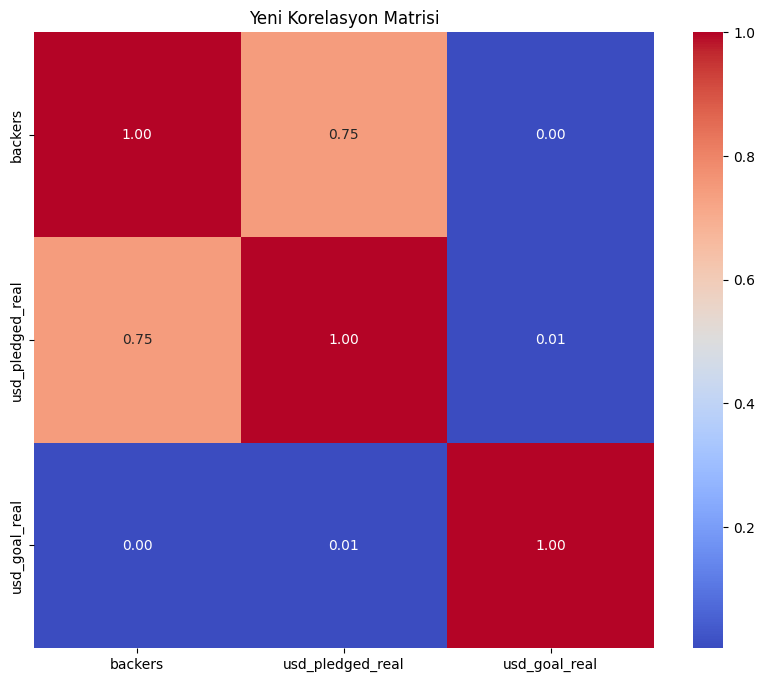

In [23]:
# Yeni numerik öznitelikler
numeric_columns = [ 'backers', 'usd_pledged_real', 'usd_goal_real']

corr_matrix = df[numeric_columns].corr()
print("Yeni Korelasyon Matrisi:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Yeni Korelasyon Matrisi")
plt.show()

**Feature selection** işlemi olarak korelasyon matrisinden yola çıkarak **3 özniteliği veri setinden çıkarttık**. Bu özniteliklerin yerine **makine öğrenmesi modeli için daha kritik etkiye sahip olabilecek "usd_pledged_real", "backers" ve "usd_goal_real" öznitelikleri kullanılacaktır.**

**Verisetinin son hali;**

In [24]:
df

,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,project_window
1,93,6,13,2017-11-01,2017-09-02,0,-4.705815e-17,10,-7.635617e-02,-0.013604,60.0
2,93,6,13,2013-02-26,2013-01-12,0,-1.131508e-01,10,-1.019547e-01,-0.000299,45.0
3,90,10,13,2012-04-16,2012-03-17,0,-1.153584e-01,10,-1.045018e-01,-0.035779,30.0
4,55,6,13,2015-08-29,2015-07-04,0,-1.010089e-01,10,-8.959157e-02,-0.022918,56.0
5,123,7,13,2016-04-01,2016-02-26,1,1.307907e-01,10,5.046294e-01,0.004136,35.0
...,...,...,...,...,...,...,...,...,...,...,...
378656,39,6,13,2014-10-17,2014-09-17,0,-1.153584e-01,10,-1.042226e-01,0.004136,30.0
378657,93,6,13,2011-07-19,2011-06-22,0,-1.109432e-01,10,-1.027107e-01,-0.038884,27.0
378658,93,6,13,2010-08-16,2010-07-01,0,-1.153584e-01,10,-1.042808e-01,-0.026909,46.0
378659,138,13,13,2016-02-13,2016-01-13,0,-1.098394e-01,10,2.115559e-17,-0.026909,31.0


Bu veriseti için **hedef (Outcome) özniteliğimiz, 0 ve 1 şeklinde değer alabilen "state" özniteliğidir**. Bu duruma göre **ikili sınıflandırmada en başarılı modeller** arasında denemeler yapılarak model seçimi yapılabilir. Fakat spesifik olarak öneri yapmak gerekirse;

-** Logistik Regresyon** : Logistik Regresyon ile **daha düşük doğruluk oranı fakat daha hızlı bir tahmin süresi** elde edilebilir.
- **XGBoost** : **En yeni algoritmalardan birisi olan XGBoost ile yüksek bir doğruluk oranı** elde edilebilir.
- **Random Forest** : 10 farklı öznitelik olduğundan bir ağaç algoritması ile **daha keskin ayrımlar yapılabilir** ve **daha doğru bir ikili sınıflandırma** yapılabilir.
- **Yapay Sinir Ağları** : Veri setimizin her ne kadar çok büyük olmasa da **katmanlar doğru seviyede ayarlanarak (hiperparametre optimizasyonu) overfittinge maruz kalmadan yüksek doğruluk oranı** elde edilebilir.